# Analytical Solution

### Importing Necessary Libraries.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.abc import x, y, u

### Setting initial parameters

In [30]:
N1 = 20
N2 = 15
N3 = 10
N = N1 + N2 + N3
beta = 0.01 
gamma = 0.02

### Setting the constants we obtained during derivation

In [31]:
C1 = -beta * N
x0 = (N1) * np.e ** ((beta / gamma) * N3)

### Setting the initial $u$ values.

In [32]:
u0 = np.e ** ((-beta/gamma) * N3)

### Setting time range.

In [33]:
t = np.linspace(0, 17, 1702)

### Here we get the integral that we derived, showcasing $t$ in terms of $u$.

In [34]:
f = 1/(x*(C1 - gamma*sympy.log(u0) + x0*beta*x))
hi = u
lo = u0
eq = sympy.integrate(f, (x, lo, hi))

### Here we get $u$ in terms of $t$.

In [35]:
eq1 = sympy.solve(eq - y, exclude=y, rational=False)

### Filling the values of $u$ by substituting $t$ into the expression we obtained.

In [36]:
u = []
for i in t:
    u.append(sympy.re(eq1[0].subs({y:i}).evalf()))

### Graphing based on the parametric form we obtained

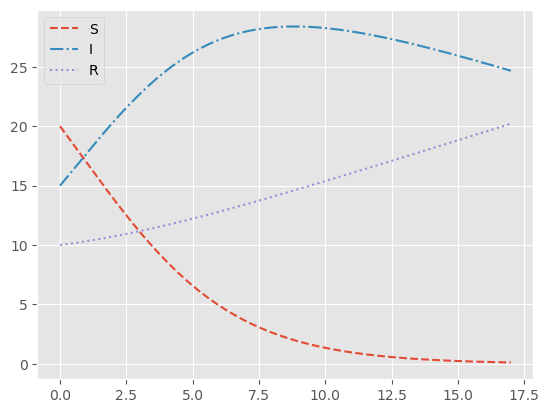

In [37]:
S = []
I = []
R = []
for i in u:
    S.append(x0 * i)
    I.append((gamma / beta) * sympy.log(i) - x0*i - (C1/beta))
    R.append((-gamma / beta) * sympy.log(i))

plt.plot(t, np.asarray(S), linestyle = "--", label = "S")
plt.plot(t, np.asarray(I), linestyle = "-.", label = "I")
plt.plot(t, np.asarray(R), linestyle = ":", label = "R")
plt.legend()
plt.style.use('ggplot')

# Euler's Method

### Initialising the constants.

In [38]:
N = 45 # Population
I0 = 15 # Initial Number of Infected People
R0 = 10 # Initial Number of Recovered
S0 = N - I0 - R0 # Initial Number of Recovered People

beta = 0.01 # Infection Rate
gamma = 0.02 # Recovery Rate

h = 0.01 # Step Size for Time
t = np.arange(0, 17 + h, h) # Time Range

### Defining a Function to Calculate Derivatives.

In [39]:
def deriv(y, t, beta, gamma):
    S = y[0]
    I = y[1]
    R = y[2]
    dSdt = -beta * S[t] * I[t]
    dIdt = beta * S[t] * I[t] - gamma * I[t]
    dRdt = gamma * I[t]
    return dSdt, dIdt, dRdt

### Aproxximating SIR Using Euler's Method.

In [40]:
s = np.zeros(len(t))
s[0] = S0

i = np.zeros(len(t))
i[0] = I0

r = np.zeros(len(t))
r[0] = R0

y = [s, i, r]

for i in range(0, len(t) - 1):
    der = deriv(y, i, beta, gamma)
    for k in range(0, 3):
        y[k][i + 1] = y[k][i] + h * der[k]

### Plotting the Results.

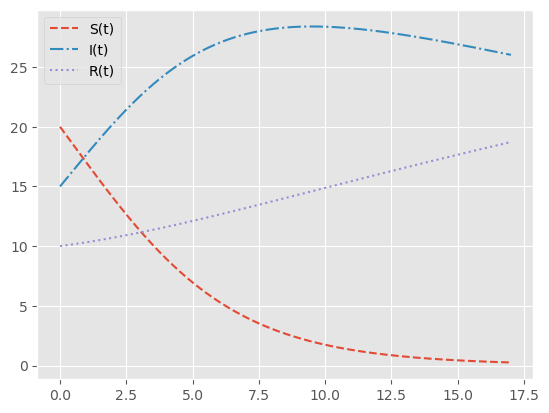

In [41]:
plt.plot(t,y[0], linestyle = "--", label="S(t)")
plt.plot(t,y[1], linestyle = "-.", label="I(t)")
plt.plot(t,y[2], linestyle = ":", label="R(t)")
plt.legend()
plt.show()

### Combined Plot.

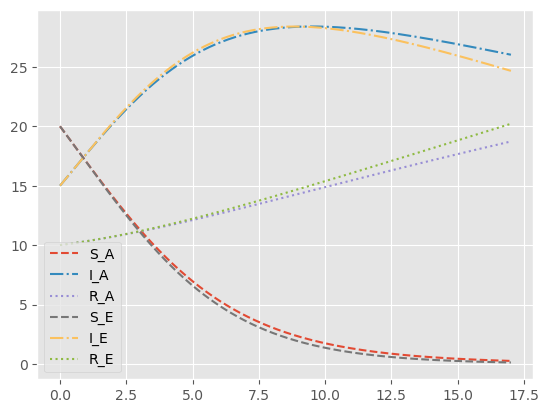

In [42]:
plt.plot(t,y[0], linestyle = "--", label="S_A")
plt.plot(t,y[1], linestyle = "-.", label="I_A")
plt.plot(t,y[2], linestyle = ":", label="R_A")
plt.plot(t, S, linestyle = "--", label = "S_E")
plt.plot(t, I, linestyle = "-.", label = "I_E")
plt.plot(t, R, linestyle = ":", label = "R_E")
plt.legend()

### Error Graph 

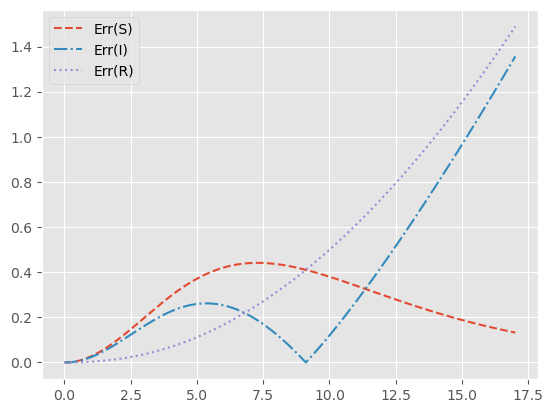

In [43]:
plt.plot(t,abs(S-y[0]), linestyle = "--", label="Err(S)")
plt.plot(t,abs(I-y[1]), linestyle = "-.", label="Err(I)")
plt.plot(t,abs(R-y[2]), linestyle = ":",  label="Err(R)")
plt.legend()
plt.show()

### Comparing Results.

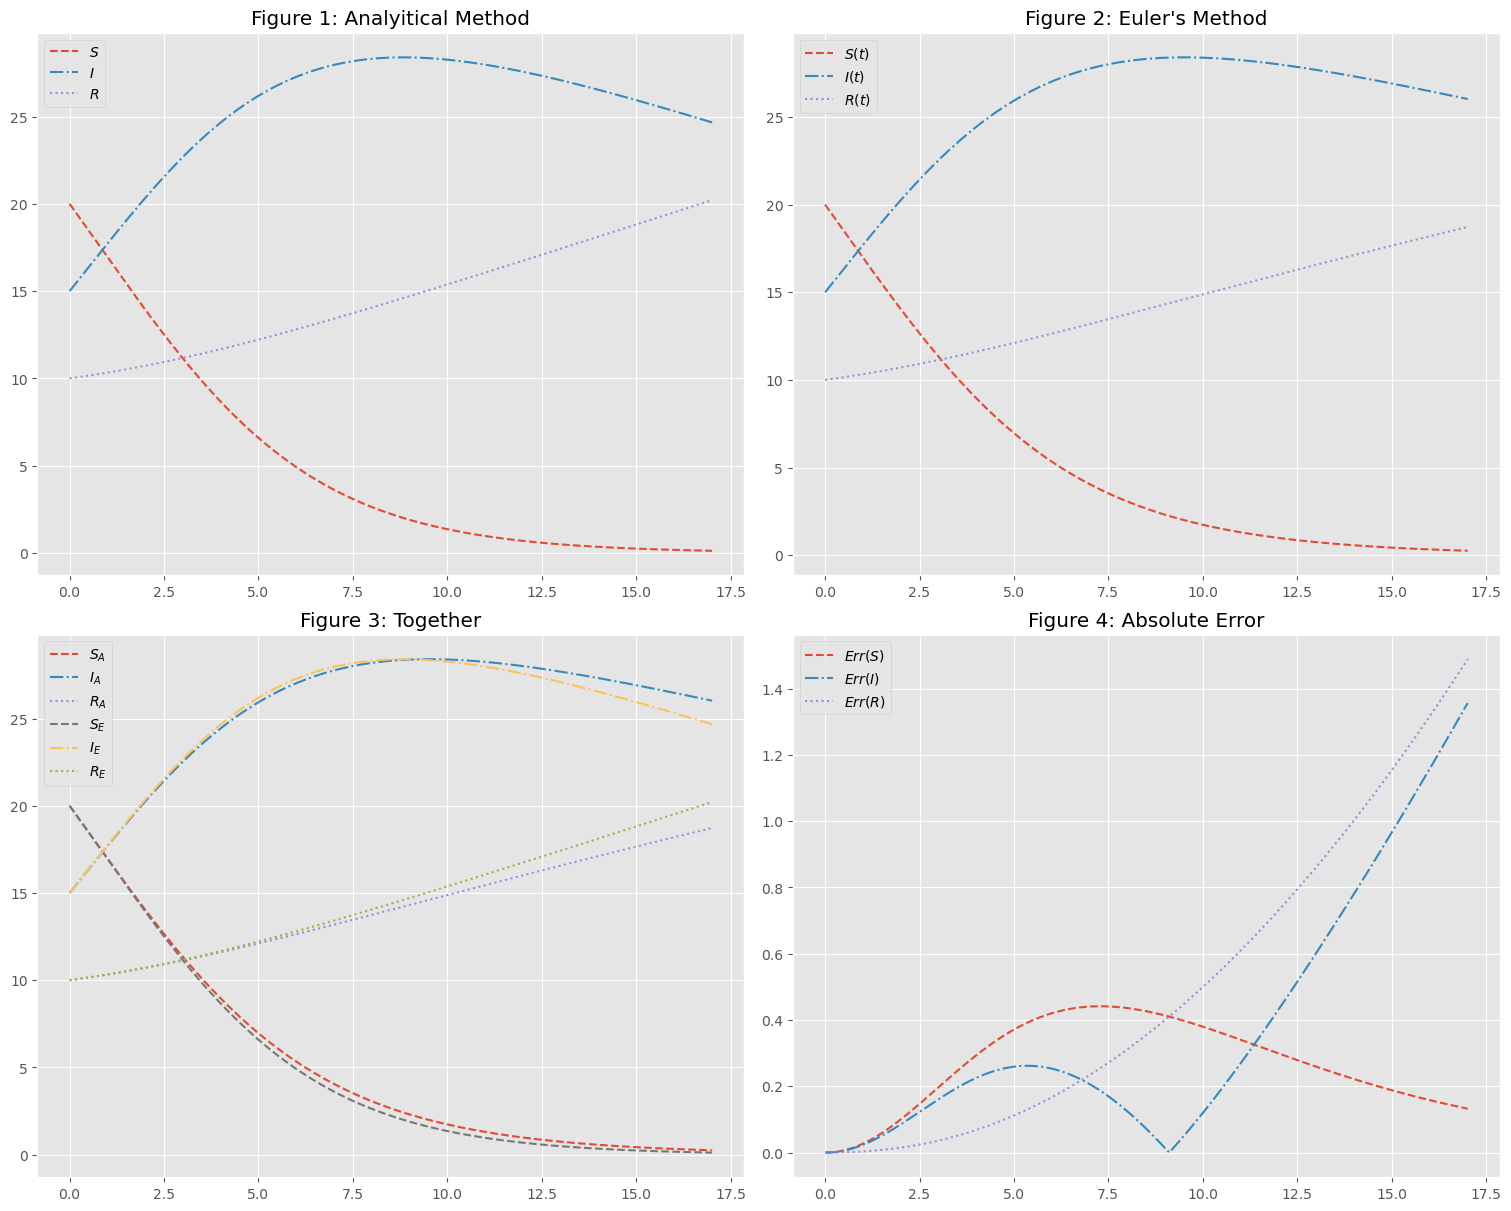

In [44]:
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic("AB;CD")
fig.set_figwidth(15)
fig.set_figheight(12)

ax_dict["D"].plot(t,abs(S-y[0]), linestyle = "--", label="$Err(S)$")
ax_dict["D"].plot(t,abs(I-y[1]), linestyle = "-.", label="$Err(I)$")
ax_dict["D"].plot(t,abs(R-y[2]), linestyle = ":",  label="$Err(R)$")
ax_dict["D"].set_title('Figure 4: Absolute Error')
ax_dict["D"].legend(loc = 'upper left')

ax_dict["C"].plot(t,y[0], linestyle = "--", label="$S_A$")
ax_dict["C"].plot(t,y[1], linestyle = "-.", label="$I_A$")
ax_dict["C"].plot(t,y[2], linestyle = ":", label="$R_A$")
ax_dict["C"].plot(t, S, linestyle = "--", label = "$S_E$")
ax_dict["C"].plot(t, I, linestyle = "-.", label = "$I_E$")
ax_dict["C"].plot(t, R, linestyle = ":", label = "$R_E$")
ax_dict["C"].set_title('Figure 3: Together')
ax_dict["C"].legend(loc = 'upper left')

ax_dict["B"].plot(t,y[0], linestyle = "--", label="$S(t)$")
ax_dict["B"].plot(t,y[1], linestyle = "-.", label="$I(t)$")
ax_dict["B"].plot(t,y[2], linestyle = ":", label="$R(t)$")
ax_dict["B"].set_title('Figure 2: Euler\'s Method')
ax_dict["B"].legend(loc = 'upper left')


ax_dict["A"].plot(t, np.asarray(S), linestyle = "--", label = "$S$")
ax_dict["A"].plot(t, np.asarray(I), linestyle = "-.", label = "$I$")
ax_dict["A"].plot(t, np.asarray(R), linestyle = ":", label = "$R$")
ax_dict["A"].set_title('Figure 1: Analyitical Method')
ax_dict["A"].legend(loc = 'upper left')

